In [1]:
import pandas as pd
import numpy as np
import scipy.stats 
from sklearn.model_selection import train_test_split 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv("/content/train_qWM28Yl.csv")
df_test=pd.read_csv("/content/test_zo1G9sv.csv")

In [3]:
#data information
print("Shape of data",df.shape)
print("="*50)
print("data information")
df.info()
print("="*50)
df.head()

Shape of data (58592, 44)
data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power               

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [4]:
df["is_claim"].value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

In [5]:
#checking Missing value
df.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [6]:
#segregating numerical and categorical feature
for col in df.columns:
    print(col,df[col].nunique())


policy_id 58592
policy_tenure 58592
age_of_car 49
age_of_policyholder 75
area_cluster 22
population_density 22
make 5
segment 6
model 11
fuel_type 3
max_torque 9
max_power 9
engine_type 11
airbags 3
is_esc 2
is_adjustable_steering 2
is_tpms 2
is_parking_sensors 2
is_parking_camera 2
rear_brakes_type 2
displacement 9
cylinder 2
transmission_type 2
gear_box 2
steering_type 3
turning_radius 9
length 9
width 10
height 11
gross_weight 10
is_front_fog_lights 2
is_rear_window_wiper 2
is_rear_window_washer 2
is_rear_window_defogger 2
is_brake_assist 2
is_power_door_locks 2
is_central_locking 2
is_power_steering 2
is_driver_seat_height_adjustable 2
is_day_night_rear_view_mirror 2
is_ecw 2
is_speed_alert 2
ncap_rating 5
is_claim 2


In [7]:

num_col=[col for col in df.columns if df[col].nunique()>=22]
cat_col=[col for col in df.columns if col not in num_col]
print("Categorical column:",cat_col,"\nNumerical column:",num_col)


Categorical column: ['make', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder', 'transmission_type', 'gear_box', 'steering_type', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'] 
Numerical column: ['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster', 'population_density']


In [8]:
#updated col
num_col=['policy_tenure', 'age_of_car', 'age_of_policyholder']
object_cols=['population_density','area_cluster','make', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder', 'transmission_type', 'gear_box', 'steering_type', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'ncap_rating'] 


In [9]:
df[num_col]

,policy_tenure,age_of_car,age_of_policyholder
0,0.515874,0.05,0.644231
1,0.672619,0.02,0.375000
2,0.841110,0.02,0.384615
3,0.900277,0.11,0.432692
4,0.596403,0.11,0.634615
...,...,...,...
58587,0.355089,0.13,0.644231
58588,1.199642,0.02,0.519231
58589,1.162273,0.05,0.451923
58590,1.236307,0.14,0.557692


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


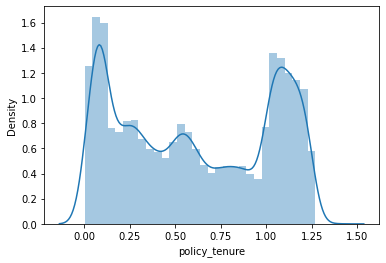

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


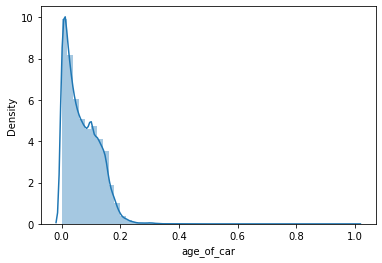

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


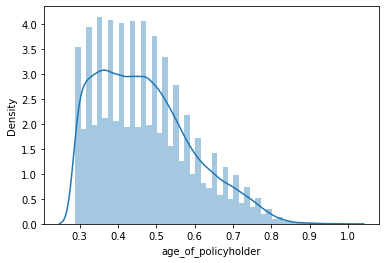

In [10]:
#distribution plot of numerical feature
for col in num_col:
  sns.distplot(df[col])
  plt.show()

policy_tenure
distribution after log transform


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


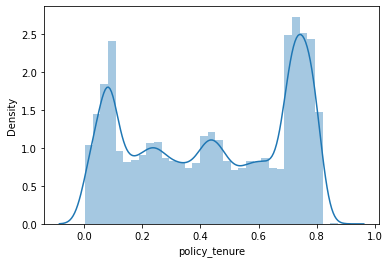

skew -0.14986252417789442
age_of_car
distribution after log transform


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


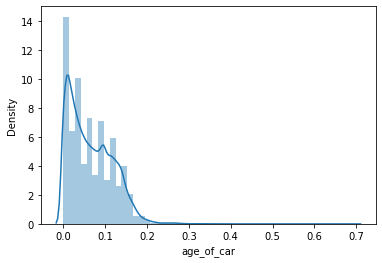

skew 0.7928248878045053
age_of_policyholder
distribution after log transform


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


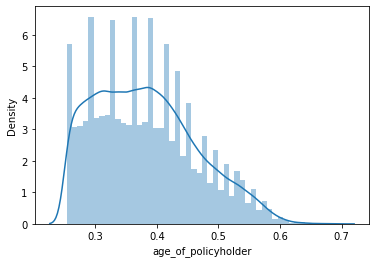

skew 0.4721287732615195


In [11]:
for col in df[num_col].columns:
  print(col)
  print("distribution after log transform")
  a=abs(np.log1p(df[col]))
  sns.distplot(a)
  plt.show()
  print("skew",scipy.stats.skew(a))
  df[col]=abs(np.log1p(df[col]))
  df_test[col]=abs(np.log1p(df_test[col]))

In [12]:
# One Hot Encoding for Other Columns
from sklearn.preprocessing import OneHotEncoder, RobustScaler, PolynomialFeatures,StandardScaler
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols= pd.DataFrame(OH_encoder.fit_transform(df[object_cols]))
OH_cols.index = df.index
OH_cols.columns = OH_encoder.get_feature_names(object_cols)
df = df.drop(object_cols, axis=1)
df = pd.concat([df, OH_cols], axis=1)

OH_cols = pd.DataFrame(OH_encoder.transform(df_test[object_cols]))
OH_cols.index = df_test.index
OH_cols.columns = OH_encoder.get_feature_names(object_cols)
df_test = df_test.drop(object_cols, axis=1)
df_test = pd.concat([df_test, OH_cols], axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
x=df.drop(["is_claim","policy_id"],axis=1)
y=df["is_claim"]
print("Shape of x",x.shape)
print("Shape of y",y.shape)

Shape of x (58592, 212)
Shape of y (58592,)


In [14]:
from sklearn.preprocessing import MinMaxScaler
for col in df[num_col]:
  scaler = MinMaxScaler()
  df[col] = scaler.fit_transform(df[[col]])
  df_test[col] = scaler.transform(df_test[[col]])

In [15]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
ROS=RandomOverSampler(random_state=42)
x_ros,y_ros=ROS.fit_resample(x,y)



In [16]:
from sklearn.feature_selection import mutual_info_regression
mi = mutual_info_regression(X = x_ros, y = y_ros)
mi_df = pd.DataFrame(list(zip(x_ros.columns,mi)), columns =['Feature','Mutual Info'])
mi_df = mi_df.sort_values('Mutual Info',ascending=False)

In [17]:
low_mi_df = mi_df[abs(mi_df['Mutual Info']) == 0]
filter_feature = sorted(list(low_mi_df['Feature']))
print("Number of low correlated features dropped: " + str(len(filter_feature)))
x_ros= x_ros.drop(filter_feature,axis=1)
#validation
x= x.drop(filter_feature,axis=1)
df_test = df_test.drop(filter_feature,axis=1)

Number of low correlated features dropped: 89


In [18]:
# pip install catboost

In [29]:
from sklearn.linear_model import BayesianRidge, HuberRegressor, Ridge, OrthogonalMatchingPursuit
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm
from lightgbm import LGBMClassifier 
from catboost import CatBoostClassifier
from sklearn.model_selection import KFold, cross_val_score,GridSearchCV
from sklearn.metrics import f1_score,make_scorer
model=CatBoostClassifier()
GB=GradientBoostingClassifier()
param = {'n_estimators': [1000,5000,10000,15000],
         "loss_function":["MultiClass"]}

GB_param ={'n_estimators':[50,60,70],
        'learning_rate':[0.25,0.5], 
        'max_features':[4,5,6,7,8],
        'random_state': [0]}

In [23]:
# GB.fit(x_ros,y_ros)

GradientBoostingClassifier()

In [30]:
gridsearch=GridSearchCV(GB,GB_param,cv=5,scoring='f1_micro')


# now perform full fit on whole pipeline
gridsearch.fit(x_ros,y_ros)
print("Best parameters from gridsearch: {}".format(gridsearch.best_params_))
print("CV score=%0.3f" % gridsearch.best_score_)

Best parameters from gridsearch: {'learning_rate': 0.5, 'max_features': 8, 'n_estimators': 70, 'random_state': 0}
CV score=0.639


Best parameters from gridsearch: {'learning_rate': 0.25, 'max_features': 4, 'n_estimators': 60, 'random_state': 0}
CV score=0.626

In [31]:
gridsearch.best_score_

0.6388118857158949

In [32]:

# GB=GradientBoostingClassifier(n_estimators=25, learning_rate=0.25, max_features=2, max_depth=2, random_state=0)
GB=GradientBoostingClassifier(n_estimators=70, learning_rate=0.25, max_features=8, random_state=0)
GB.fit(x_ros,y_ros)

GradientBoostingClassifier(learning_rate=0.25, max_features=8, n_estimators=70,
                           random_state=0)

In [33]:
# model=CatBoostClassifier(eval_metric= 'TotalF1',n_estimators=100) 



In [34]:
# model.fit(x_ros,y_ros)

In [35]:
df_test1=df_test.drop(["policy_id"],axis=1)

In [36]:
# y_pred=model.predict(df_test1)

In [37]:
y_pred=GB.predict(df_test1)

In [38]:
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [39]:
submission_test=df_test[["policy_id"]]
submission_test["is_claim"]=y_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
submission_test["is_claim"].value_counts()

0    24842
1    14221
Name: is_claim, dtype: int64

In [41]:
result = f1_score(y_ros,GB.predict(x_ros))
result

0.654717532077157

In [42]:
result = f1_score(y,GB.predict(x))
result

0.17398303095341897

In [44]:
submission_test=df_test[["policy_id"]]
submission_test["is_claim"]=y_pred
submission_test.to_csv('/content/submission_GB_20.csv',index= False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
